In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\User\Linear_Regression_Implementation\Linear_diabites\diabetes.csv")
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


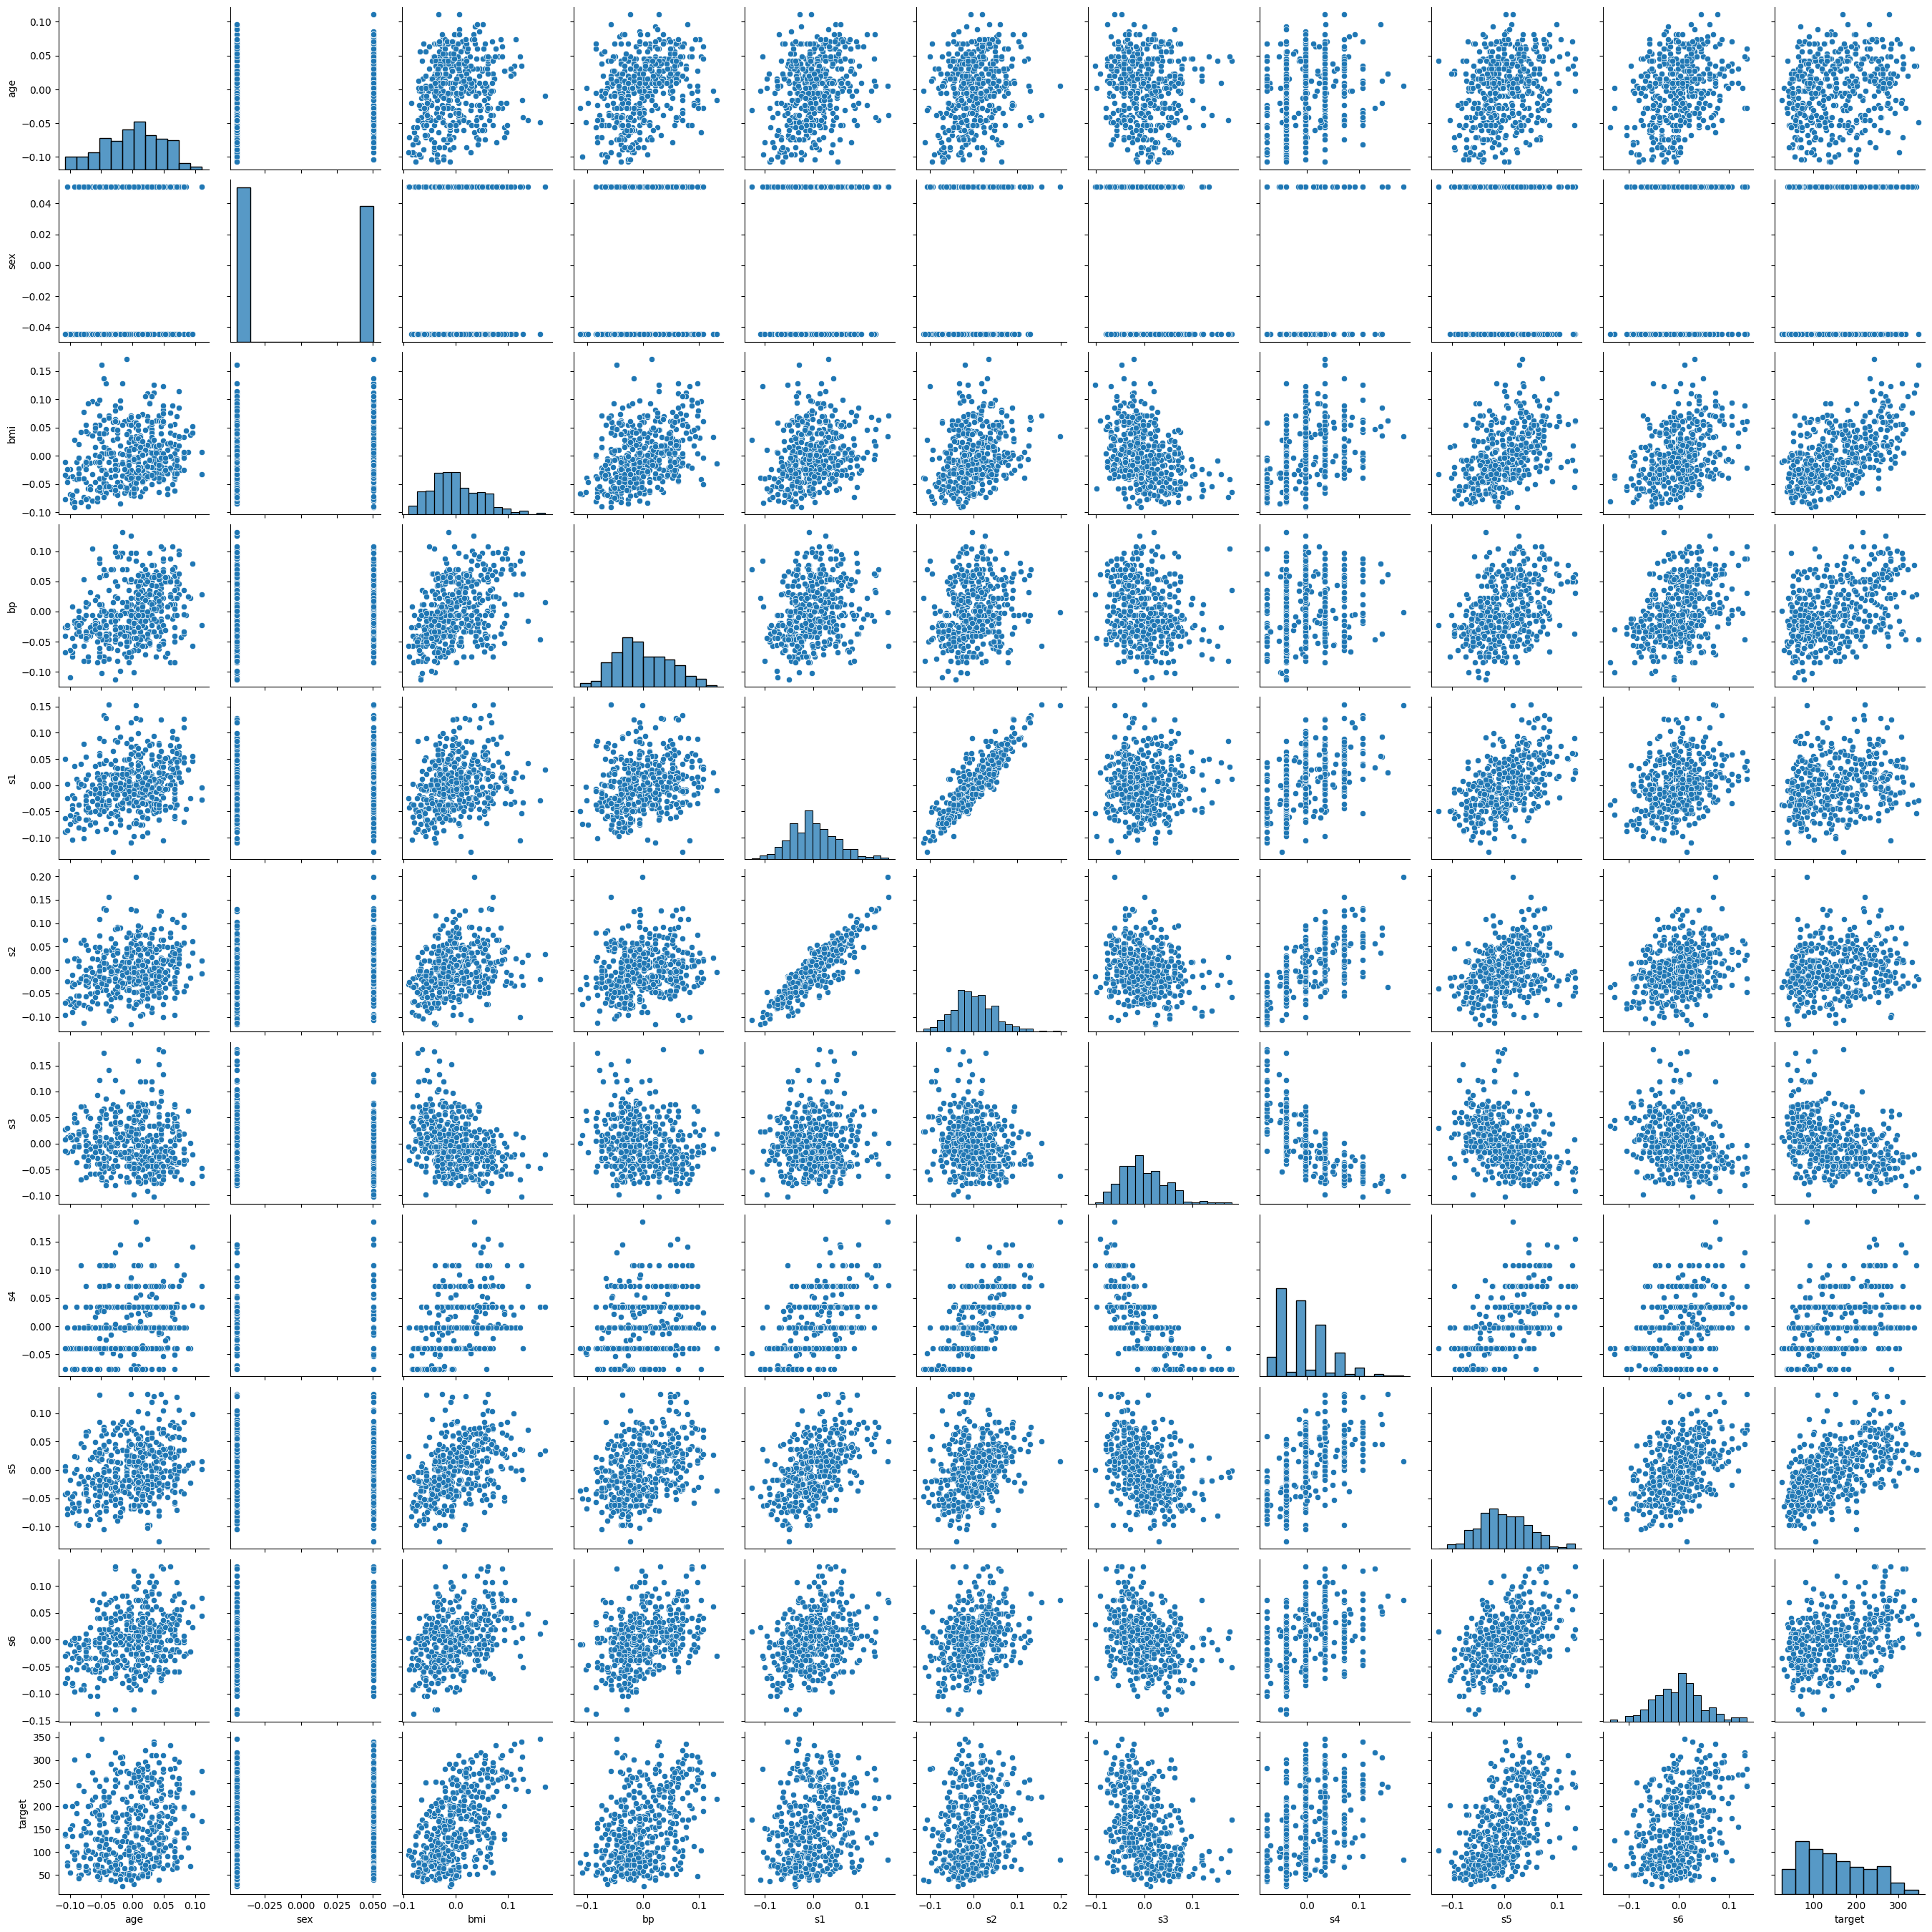

In [ ]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='s3', ylabel='s4'>

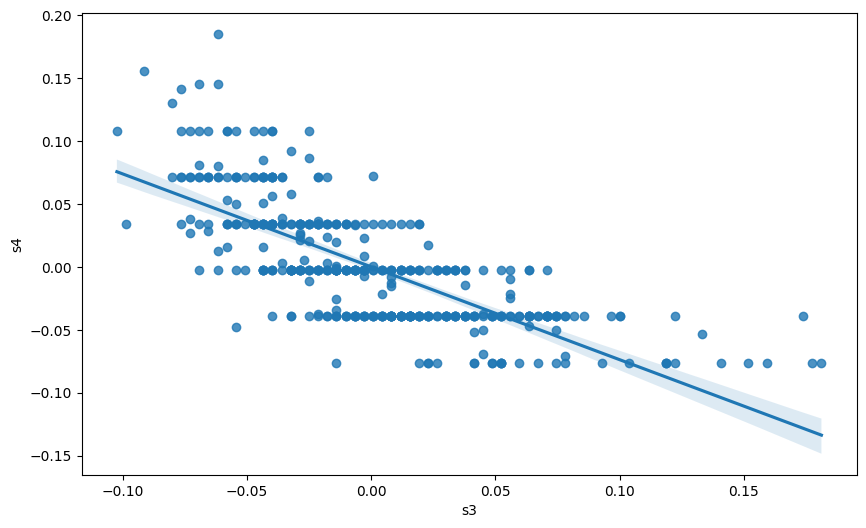

In [ ]:
#analysis of correlation between features
plt.figure(figsize=(10,6))
sns.regplot(x='s3', y='s4', data=df)


In [ ]:
import numpy as np
#Independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
#model training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
#print coefficients
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [  1.35246724 -12.45426893  26.21004615  18.61443344 -43.26039442
  24.2556288    5.73862584  13.96342685  31.57521526   1.98339354]
Intercept: 153.90291262135923


In [ ]:
# on which parameters the model is trained
print("Parameters:", regressor.get_params())

Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [ ]:
#prediction with test data
y_pred = regressor.predict(X_test)
y_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

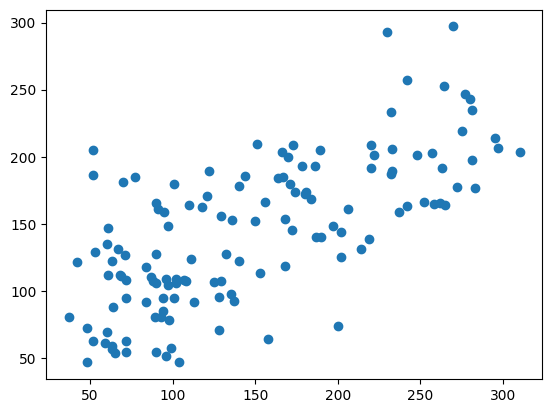

In [ ]:
#plot a scatter plot for y_test and y_pred
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred
residuals

287     80.530300
211   -111.100523
72      76.655991
321    -62.759773
73     -12.883053
          ...    
238     54.002213
26      44.898996
7      -59.288768
401     12.191330
108     -1.218705
Name: target, Length: 133, dtype: float64

<Axes: xlabel='target', ylabel='Count'>

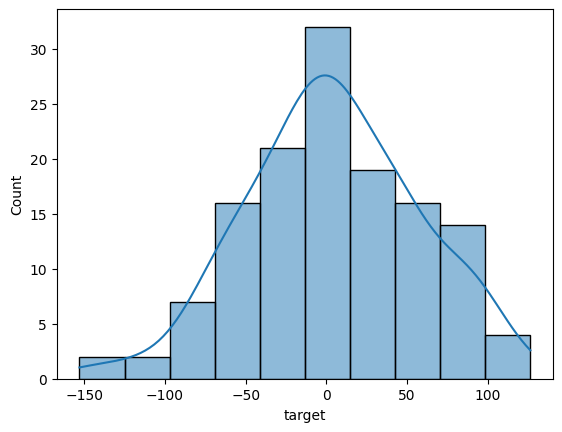

In [ ]:
#plot residuals
sns.histplot(residuals, kde=True)

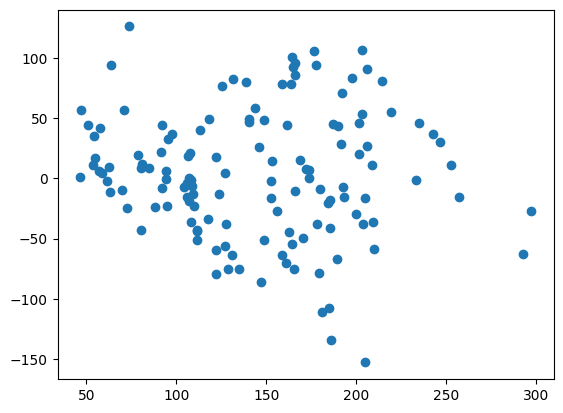

In [ ]:
#scatter plot predictiosn vs residuals
plt.scatter(y_pred, residuals)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 41.91937845679273
Mean Squared Error: 2821.750981001311
53.120156070942706


In [ ]:
# r square and adjusted r square
from sklearn.metrics import r2_score
print("R Square:", r2_score(y_test, y_pred))
print("Adjusted R Square:", 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R Square: 0.4772897164322617
Adjusted R Square: 0.43444461122179134


In [ ]:
score=r2_score(y_test, y_pred)
print("R2 Score:",score)

R2 Score: 0.4772897164322617


In [ ]:
#new data prediction
new_data = np.array([[0.038075906, 0.05068012, 0.061696206, 0.021872354, -0.044223498,
                      -0.03482076, -0.043400846, -0.002592262, 0.01990749, -0.017646125]])
new_data_scaled = scaler.transform(new_data)
new_prediction = regressor.predict(new_data_scaled)
print("New Data Prediction:", new_prediction)

New Data Prediction: [209.68989474]


c:\Users\User\Linear_Regression_Implementation\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#pickle the model for deployment
import pickle
pickle.dump(regressor, open('linear_regression_model.pkl', 'wb'))
pickled_model = pickle.load(open('linear_regression_model.pkl', 'rb'))
pickled_model.predict(new_data_scaled)


array([209.68989474])